In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/phys591000-charged-particle-tracking/pairs.csv
/kaggle/input/phys591000-charged-particle-tracking/data_preselection.csv


# Data structure

In [3]:
data = pd.read_csv('../input/phys591000-charged-particle-tracking/data_preselection.csv')
pairs = pd.read_csv('../input/phys591000-charged-particle-tracking/pairs.csv')
print(data.columns)
print(pairs.columns)


Index(['Unnamed: 0', 'hit_id', 'x', 'y', 'z', 'volume_id', 'layer_id',
       'module_id', 'particle_id', 'tx', 'ty', 'tz', 'tpx', 'tpy', 'tpz',
       'weight', 'vx', 'vy', 'vz', 'px', 'py', 'pz', 'q', 'nhits', 'pt', 'r',
       'phi', 'layer', 'evtid'],
      dtype='object')
Index(['Unnamed: 0', 'evtid', 'index_1', 'index_2', 'hit_id_1', 'hit_id_2',
       'layer_1', 'layer_2', 'particle_id_1', 'particle_id_2', 'z_1', 'z_2',
       'r_1', 'r_2', 'dphi', 'dz', 'dr', 'y', 'phi_slope', 'z0', 'deta'],
      dtype='object')


In [4]:
pairs[pairs["y"]==True]

,Unnamed: 0,evtid,index_1,index_2,hit_id_1,hit_id_2,layer_1,layer_2,particle_id_1,particle_id_2,...,z_2,r_1,r_2,dphi,dz,dr,y,phi_slope,z0,deta
3358,3358,1000,24252,24254,24747,32553,0,1,734088457248309248,734088457248309248,...,339.29300,31.514478,72.651279,0.014990,193.93000,41.136802,True,0.000364,-3.204765,-0.012128
5038,5038,1000,17643,17644,22557,31125,0,1,734088525967785984,734088525967785984,...,124.48900,32.523967,73.027389,-0.041159,70.46380,40.503423,True,-0.001016,-2.556741,-0.022273
6718,6718,1000,10055,10057,20485,29089,0,1,734088732126216192,734088732126216192,...,-12.41560,32.108287,71.588446,-0.041550,-5.31656,39.480159,True,-0.001052,-2.775206,-0.046762
8398,8398,1000,10813,10815,20692,29289,0,1,734088800845692928,734088800845692928,...,-18.56850,32.043614,72.816691,0.024649,-8.93350,40.773077,True,0.000605,-2.614151,-0.044011
10078,10078,1000,10234,10235,20527,29126,0,1,734088869565169664,734088869565169664,...,-16.48490,32.761371,72.178226,-0.005788,-7.56546,39.416855,True,-0.000147,-2.631398,-0.042548
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7083944,7083944,1000,12306,12308,37299,43588,2,3,968298315298897920,968298315298897920,...,11.34690,114.900932,171.413342,0.005384,5.73752,56.512410,True,0.000095,-6.056135,-0.017348
7085130,7085130,1000,16337,16338,36910,43850,2,3,968301270236397568,968301270236397568,...,88.12670,115.547480,172.464290,-0.122298,32.61000,56.916810,True,-0.002149,-10.685242,-0.027343
7086316,7086316,1000,9542,9543,36219,42704,2,3,968301338955874304,968301338955874304,...,-5.60938,116.481681,172.494533,0.023899,-0.45001,56.012852,True,0.000427,-4.223550,-0.011765
7087502,7087502,1000,11803,11804,35016,41253,2,3,968305462124478464,968305462124478464,...,-216.17500,115.758948,171.108083,-0.024665,-67.36800,55.349135,True,-0.000446,-7.911414,-0.013647


In [5]:
data.head()

,Unnamed: 0,hit_id,x,y,z,volume_id,layer_id,module_id,particle_id,tx,...,px,py,pz,q,nhits,pt,r,phi,layer,evtid
0,25134,25307,32.041100,0.989847,278.5060,8,2,168,734087976211972096,32.041500,...,0.220916,-0.002604,1.938790,-1,12,0.220931,32.056386,0.030883,0,1000
1,25013,25193,0.198471,-31.996400,232.4100,8,2,164,734088251089879040,0.209228,...,0.016832,-1.039440,7.635270,1,15,1.039576,31.997016,-1.564593,0,1000
2,24252,24747,22.565600,-21.999000,145.3630,8,2,150,734088457248309248,22.572900,...,0.589766,-0.587481,3.909300,-1,15,0.832441,31.514478,-0.772685,0,1000
3,24254,32553,52.775500,-49.929500,339.2930,8,4,365,734088457248309248,52.775500,...,0.589766,-0.587481,3.909300,-1,15,0.832441,72.651279,-0.757695,1,1000
4,17643,22557,28.996300,14.731700,54.0252,8,2,122,734088525967785984,28.994700,...,0.247864,0.136638,0.493284,1,13,0.283031,32.523967,0.470070,0,1000


In [6]:
pairs.head()

,Unnamed: 0,evtid,index_1,index_2,hit_id_1,hit_id_2,layer_1,layer_2,particle_id_1,particle_id_2,...,z_2,r_1,r_2,dphi,dz,dr,y,phi_slope,z0,deta
0,0,1000,25134,24254,25307,32553,0,1,734087976211972096,734088457248309248,...,339.2930,32.056386,72.651279,-0.788578,60.7870,40.594893,False,-0.019426,230.504604,0.612776
1,1,1000,25134,17644,25307,31125,0,1,734087976211972096,734088525967785984,...,124.4890,32.056386,73.027389,0.398028,-154.0170,40.971003,False,0.009715,399.011431,1.555191
2,2,1000,25134,10057,25307,29089,0,1,734087976211972096,734088732126216192,...,-12.4156,32.056386,71.588446,0.760724,-290.9216,39.532060,False,0.019243,514.413137,3.030958
3,3,1000,25134,10815,25307,29289,0,1,734087976211972096,734088800845692928,...,-18.5685,32.056386,72.816691,1.590782,-297.0745,40.760305,False,0.039028,512.143477,3.110704
4,4,1000,25134,10235,25307,29126,0,1,734087976211972096,734088869565169664,...,-16.4849,32.056386,72.178226,0.859930,-294.9909,40.121840,False,0.021433,514.196640,3.084837


In [7]:
buffer = sorted(list(data['particle_id']))
ten_particles = []
flag = -1
while(len(ten_particles)<10):
    
    if(buffer[flag] not in ten_particles):
        ten_particles.append(buffer[flag])
    flag -= 1
ten_particle_results = []
ten_particle_pairs = []
for i in range(10):
    ten_particle_results.append(data[data['particle_id']==ten_particles[i]])
    ten_particle_pairs.append(pairs[pairs['particle_id_1']==ten_particles[i]])
ten_particle_results = pd.concat(ten_particle_results)
ten_particle_pairs = pd.concat(ten_particle_pairs)

print(ten_particle_results.shape)
print(ten_particle_results.columns)
ten_particle_results.head()

(32, 29)
Index(['Unnamed: 0', 'hit_id', 'x', 'y', 'z', 'volume_id', 'layer_id',
       'module_id', 'particle_id', 'tx', 'ty', 'tz', 'tpx', 'tpy', 'tpz',
       'weight', 'vx', 'vy', 'vz', 'px', 'py', 'pz', 'q', 'nhits', 'pt', 'r',
       'phi', 'layer', 'evtid'],
      dtype='object')


,Unnamed: 0,hit_id,x,y,z,volume_id,layer_id,module_id,particle_id,tx,...,px,py,pz,q,nhits,pt,r,phi,layer,evtid
6099,10263,22756,16.2097,27.0881,-0.746876,8,2,123,968307936025640960,16.2076,...,-0.158693,-0.093017,0.057719,1,2,0.183944,31.567698,1.031549,0,1000
6098,25782,26874,54.5485,46.3592,-219.934000,8,4,116,968306218038722560,54.5540,...,0.082110,0.084122,-0.415145,-1,1,0.117553,71.587110,0.704419,1,1000
6095,25872,27384,62.3120,35.9843,-174.670000,8,4,147,968306149319245824,62.3110,...,0.486316,0.268579,-1.227300,1,10,0.555552,71.955925,0.523700,1,1000
6096,25873,34426,101.1040,54.5557,-269.239000,8,6,186,968306149319245824,101.1020,...,0.486316,0.268579,-1.227300,1,10,0.555552,114.884042,0.494823,2,1000
6097,25875,40414,153.5210,76.1245,-394.129000,8,8,123,968306149319245824,153.5210,...,0.486316,0.268579,-1.227300,1,10,0.555552,171.358212,0.460328,3,1000


In [8]:
print(ten_particle_pairs.shape)
print(ten_particle_pairs.columns)
ten_particle_pairs.head()

(35494, 21)
Index(['Unnamed: 0', 'evtid', 'index_1', 'index_2', 'hit_id_1', 'hit_id_2',
       'layer_1', 'layer_2', 'particle_id_1', 'particle_id_2', 'z_1', 'z_2',
       'r_1', 'r_2', 'dphi', 'dz', 'dr', 'y', 'phi_slope', 'z0', 'deta'],
      dtype='object')


,Unnamed: 0,evtid,index_1,index_2,hit_id_1,hit_id_2,layer_1,layer_2,particle_id_1,particle_id_2,...,z_2,r_1,r_2,dphi,dz,dr,y,phi_slope,z0,deta
3084323,3084323,1000,10263,24254,22756,32553,0,1,968307936025640960,734088457248309248,...,339.2930,31.567698,72.651279,-1.789244,340.039876,41.083582,False,-0.043551,-262.025849,-2.269268
3084324,3084324,1000,10263,17644,22756,31125,0,1,968307936025640960,734088525967785984,...,124.4890,31.567698,73.027389,-0.602638,125.235876,41.459692,False,-0.014536,-96.102344,-1.326853
3084325,3084325,1000,10263,10057,22756,29089,0,1,968307936025640960,734088732126216192,...,-12.4156,31.567698,71.588446,-0.239942,-11.668724,40.020749,False,-0.005995,8.457219,0.148915
3084326,3084326,1000,10263,10815,22756,29289,0,1,968307936025640960,734088800845692928,...,-18.5685,31.567698,72.816691,0.590116,-17.821624,41.248994,False,0.014306,12.891945,0.228660
3084327,3084327,1000,10263,10235,22756,29126,0,1,968307936025640960,734088869565169664,...,-16.4849,31.567698,72.178226,-0.140736,-15.738024,40.610529,False,-0.003465,11.486729,0.202794


In [9]:
true_edges = ten_particle_pairs[ten_particle_pairs['y'] == True]
fake_edges = ten_particle_pairs[ten_particle_pairs['y'] == False]
true_edges.head()

,Unnamed: 0,evtid,index_1,index_2,hit_id_1,hit_id_2,layer_1,layer_2,particle_id_1,particle_id_2,...,z_2,r_1,r_2,dphi,dz,dr,y,phi_slope,z0,deta
5431845,5431845,1000,25872,25873,27384,34426,1,2,968306149319245824,968306149319245824,...,-269.2390,71.955925,114.884042,-0.028877,-94.5690,42.928117,True,-0.000673,-16.153849,-0.032433
7089873,7089873,1000,25873,25875,34426,40414,2,3,968306149319245824,968306149319245824,...,-394.1290,114.884042,171.358212,-0.034495,-124.8900,56.474170,True,-0.000611,-15.178283,-0.017224
3084320,3084320,1000,4468,4469,18964,26956,0,1,968305530843955200,968305530843955200,...,-248.9230,31.748267,72.522278,0.035803,-140.4210,40.774011,True,0.000878,0.835378,0.004146
5430446,5430446,1000,4469,4470,26956,33745,1,2,968305530843955200,968305530843955200,...,-399.8870,72.522278,116.213012,0.043636,-150.9640,43.690734,True,0.000999,1.662243,0.002408
3082640,3082640,1000,11801,11802,20950,28274,0,1,968305462124478464,968305462124478464,...,-96.0693,32.050255,72.503303,-0.017477,-49.3556,40.453048,True,-0.000432,-7.610106,-0.077340


In [10]:
fake_edges.head()

,Unnamed: 0,evtid,index_1,index_2,hit_id_1,hit_id_2,layer_1,layer_2,particle_id_1,particle_id_2,...,z_2,r_1,r_2,dphi,dz,dr,y,phi_slope,z0,deta
3084323,3084323,1000,10263,24254,22756,32553,0,1,968307936025640960,734088457248309248,...,339.2930,31.567698,72.651279,-1.789244,340.039876,41.083582,False,-0.043551,-262.025849,-2.269268
3084324,3084324,1000,10263,17644,22756,31125,0,1,968307936025640960,734088525967785984,...,124.4890,31.567698,73.027389,-0.602638,125.235876,41.459692,False,-0.014536,-96.102344,-1.326853
3084325,3084325,1000,10263,10057,22756,29089,0,1,968307936025640960,734088732126216192,...,-12.4156,31.567698,71.588446,-0.239942,-11.668724,40.020749,False,-0.005995,8.457219,0.148915
3084326,3084326,1000,10263,10815,22756,29289,0,1,968307936025640960,734088800845692928,...,-18.5685,31.567698,72.816691,0.590116,-17.821624,41.248994,False,0.014306,12.891945,0.228660
3084327,3084327,1000,10263,10235,22756,29126,0,1,968307936025640960,734088869565169664,...,-16.4849,31.567698,72.178226,-0.140736,-15.738024,40.610529,False,-0.003465,11.486729,0.202794


# Data visulization

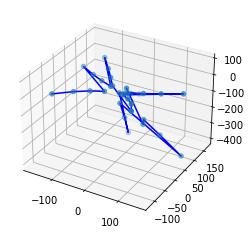

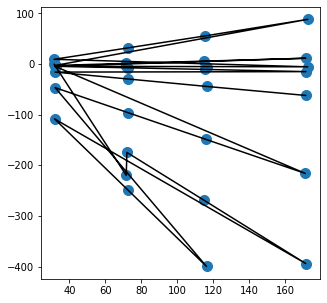

In [21]:
import matplotlib.pyplot as plt
ax = plt.axes(projection='3d')

ax.plot3D(ten_particle_results['x'], ten_particle_results['y'], ten_particle_results['z'], 'blue')
ax.scatter3D(ten_particle_results['x'], ten_particle_results['y'], ten_particle_results['z'], cmap = 'red')




# 2D figure to show these 10 particle tracks in cylinder coordinate. (z-r) 
fig, ax1 = plt.subplots(figsize=(5, 5))
# print(len(list(ten_particle_results['z'])), len(list(ten_particle_results['r'])))
plt.scatter( np.array(ten_particle_results['r']), np.array(ten_particle_results['z']), s=100)
plt.plot( np.array(ten_particle_results['r']), np.array(ten_particle_results['z']), 'black')

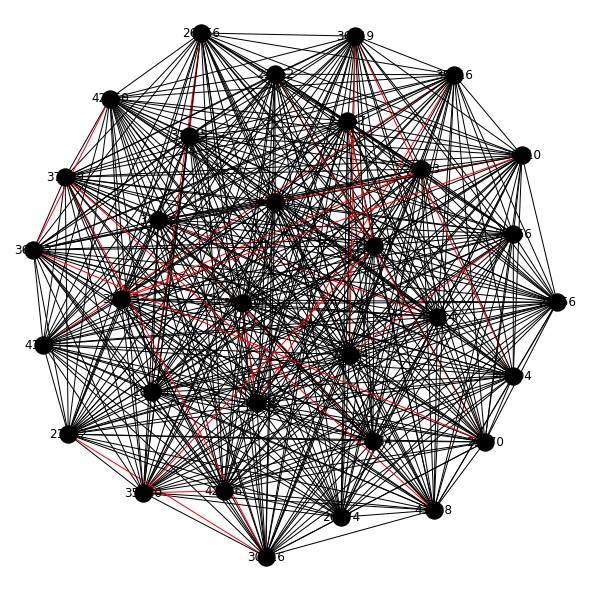

In [22]:
from itertools import combinations
import networkx as nx
graph = nx.Graph()
graph.add_nodes_from(ten_particle_results['hit_id'])
fully_edges = list(combinations(list(ten_particle_results['hit_id']), 2))

# print(true_edges['hit_id_1'])
for i in fully_edges:
    graph.add_edge(i[0], i[1], color = 'black')
for i in range(len(true_edges['hit_id_1'])):
    graph[list(true_edges['hit_id_1'])[i]][list(true_edges['hit_id_2'])[i]]['color'] = 'red'

edges = graph.edges()
colors = [graph[u][v]['color'] for u,v in edges]
plt.figure(figsize = (8, 8))
nx.draw(graph, with_labels=True, node_color = 'black', edge_color =colors)

In [23]:
Graph_Truth = nx.Graph()
Graph_Truth.add_nodes_from(ten_particle_results['hit_id'])

for i in range(len(true_edges['hit_id_1'])):
    Graph_Truth.add_edge(list(true_edges['hit_id_1'])[i],list(true_edges['hit_id_2'])[i])

In [24]:
print(len(ten_particle_pairs['hit_id_1']))

35494


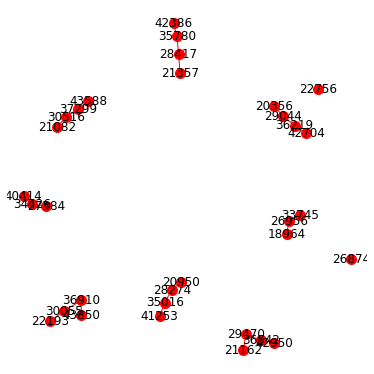

In [25]:
plt.figure(figsize = (5, 5))
nx.draw(Graph_Truth, with_labels=True, node_color = 'red', edge_color ='red', node_size = 100, width = 1)


# Discussion

Ans: The goal of this project is try to distinguish the "true" track from all the other. The label result is from the simulation result which give us the particle id, therefore, we can tell the pair is ture based on whether the particle_id_1 and particle_id_2 are the same. Furthermore, the trajectory of a particle between different layers must have some relation which is from the property of the charged particle. Therefore, to classify the ture and the false edge, we can use LSTM to be the classifier, because it can contain the memory effect, on the other words, it can take the previous hits spot into consideration.